<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Split-the-datasets" data-toc-modified-id="Split-the-datasets-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Split the datasets</a></span></li><li><span><a href="#Model-1" data-toc-modified-id="Model-1-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Model 1</a></span></li><li><span><a href="#Applying-Filters" data-toc-modified-id="Applying-Filters-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Applying Filters</a></span></li><li><span><a href="#Model-V2-using-CNN" data-toc-modified-id="Model-V2-using-CNN-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Model V2 using CNN</a></span></li></ul></div>

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
import keras

In [5]:
keras.__version__

'2.1.2'

In [6]:
import tensorflow as tf

In [8]:
tf.__version__

'1.9.0'

In [9]:
import cv2

In [10]:
cv2.__version__

'3.3.0'

In [11]:
import pandas as pd

In [12]:
!pwd

/Users/manaranjan/Documents/Work/DeepLearning/DL_DraftCourse/Classdemo/BDA


In [13]:
mnist_df = pd.read_csv('../../data/mnist.csv')

In [14]:
mnist_df.head(10)

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [21]:
Y = mnist_df['label'].values

In [18]:
mnist_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42000 entries, 0 to 41999
Columns: 785 entries, label to pixel783
dtypes: int64(785)
memory usage: 251.5 MB


In [26]:
import numpy as np

In [30]:
X = mnist_df.iloc[:,1:].values

In [31]:
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [33]:
import matplotlib.pyplot as plt

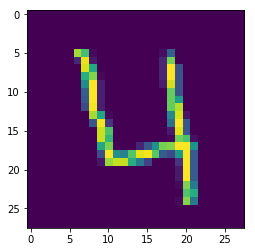

In [39]:
plt.imshow(X[3].reshape(28,28))

In [163]:
X_reshaped = np.array([x.reshape(28,28,1) for x in X])

In [164]:
X_reshaped.shape

(42000, 28, 28, 1)

In [45]:
import keras

In [46]:
y_labels = keras.utils.to_categorical(Y)

In [47]:
y_labels

array([[0., 1., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])

### Split the datasets

In [48]:
from sklearn.model_selection import train_test_split

In [81]:
X_train, X_test, \
y_train, y_test = train_test_split(X,
                                   y_labels,
                                   train_size = 0.8,
                                   random_state = 42)

### Model 1

In [82]:
from keras import Sequential
from keras.layers import Activation, Dense, Flatten

In [83]:
model_v1 = Sequential()
model_v1.add(Dense(64, input_shape = (784,)))
model_v1.add(Activation('sigmoid'))
model_v1.add(Dense(32))
model_v1.add(Activation('sigmoid'))
model_v1.add(Dense(10))
model_v1.add(Activation('softmax'))

In [84]:
model_v1.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_38 (Dense)             (None, 64)                50240     
_________________________________________________________________
activation_35 (Activation)   (None, 64)                0         
_________________________________________________________________
dense_39 (Dense)             (None, 32)                2080      
_________________________________________________________________
activation_36 (Activation)   (None, 32)                0         
_________________________________________________________________
dense_40 (Dense)             (None, 10)                330       
_________________________________________________________________
activation_37 (Activation)   (None, 10)                0         
Total params: 52,650
Trainable params: 52,650
Non-trainable params: 0
_________________________________________________________________


In [62]:
1792*32+32

57376

In [92]:
model_v1.compile(optimizer='sgd',
                 loss = 'categorical_crossentropy',
                 metrics = ['accuracy'])

In [93]:
BATCH_SIZE = 64
EPOCH = 10

In [96]:
history_v1 = model_v1.fit(X_train, 
             y_train,
             batch_size=BATCH_SIZE, 
             epochs=EPOCH,
             validation_split = 0.3,
             verbose = 1)

Train on 23520 samples, validate on 10080 samples
Epoch 1/10
23520/23520 [==============================] - 1s 37us/step - loss: 0.5545 - acc: 0.8873 - val_loss: 0.5497 - val_acc: 0.8864
Epoch 2/10
23520/23520 [==============================] - 1s 37us/step - loss: 0.5168 - acc: 0.8920 - val_loss: 0.5186 - val_acc: 0.8916
Epoch 3/10
23520/23520 [==============================] - 1s 36us/step - loss: 0.4875 - acc: 0.8962 - val_loss: 0.4871 - val_acc: 0.8925
Epoch 4/10
23520/23520 [==============================] - 1s 36us/step - loss: 0.4601 - acc: 0.8979 - val_loss: 0.4681 - val_acc: 0.8954
Epoch 5/10
23520/23520 [==============================] - 1s 36us/step - loss: 0.4399 - acc: 0.9017 - val_loss: 0.4482 - val_acc: 0.8977
Epoch 6/10
23520/23520 [==============================] - 1s 36us/step - loss: 0.4166 - acc: 0.9034 - val_loss: 0.4336 - val_acc: 0.8980
Epoch 7/10
23520/23520 [==============================] - 1s 36us/step - loss: 0.4013 - acc: 0.9053 - val_loss: 0.4129 - val_acc

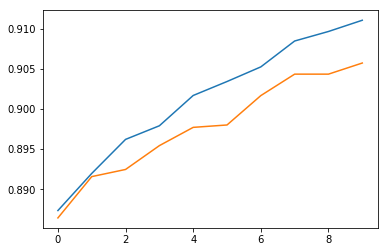

In [102]:
plt.plot(history_v1.history['acc'], label = 'training')
plt.plot(history_v1.history['val_acc'], label = 'training')

### Applying Filters

In [124]:
filter_top = [[-1,-1,-1],
              [-1,8,-1],
              [-1,-1,-1]]

In [125]:
filter_top

[[-1, -1, -1], [-1, 8, -1], [-1, -1, -1]]

In [126]:
from scipy.ndimage.filters import convolve

In [127]:
X_filtered = convolve(X_reshaped[4], filter_top)

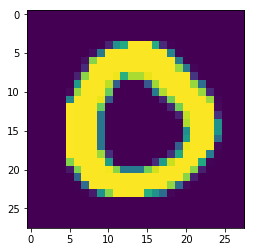

In [128]:
plt.imshow(X_reshaped[4])

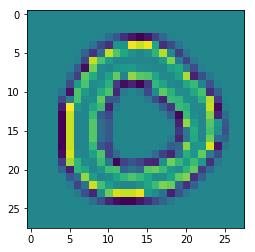

In [129]:
plt.imshow(X_filtered)

### Model V2 using CNN

In [165]:
X_train, X_test, \
y_train, y_test = train_test_split(X_reshaped,
                                   y_labels,
                                   train_size = 0.8,
                                   random_state = 42)

In [166]:
X_train.shape

(33600, 28, 28, 1)

In [167]:
from keras.layers import Conv2D, MaxPool2D

In [168]:
model_v2 = Sequential()
model_v2.add(Conv2D(filters=8,
                    kernel_size=(3,3), 
                    input_shape=(28,28,1)))
model_v2.add(MaxPool2D(pool_size = (2,2)))
model_v2.add(Conv2D(filters=4,
                    kernel_size=(3,3)))
model_v2.add(MaxPool2D(pool_size = (2,2)))
model_v2.add(Flatten())
model_v2.add(Dense(64))
model_v2.add(Activation('sigmoid'))
model_v2.add(Dense(32))
model_v2.add(Activation('sigmoid'))
model_v2.add(Dense(10))
model_v2.add(Activation('softmax'))

In [169]:
model_v2.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_16 (Conv2D)           (None, 26, 26, 8)         80        
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 13, 13, 8)         0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 11, 11, 4)         292       
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 5, 5, 4)           0         
_________________________________________________________________
flatten_15 (Flatten)         (None, 100)               0         
_________________________________________________________________
dense_65 (Dense)             (None, 64)                6464      
_________________________________________________________________
activation_62 (Activation)   (None, 64)                0         
__________

In [170]:
model_v2.compile(optimizer='adam',
                 loss = 'categorical_crossentropy',
                 metrics = ['accuracy'])

In [172]:
history_v2 = model_v2.fit(X_train,
             y_train,
             batch_size = BATCH_SIZE,
             epochs = EPOCH,
             validation_split = 0.3,
             verbose = 1)             

Train on 23520 samples, validate on 10080 samples
Epoch 1/10
23520/23520 [==============================] - 3s 148us/step - loss: 0.1563 - acc: 0.9526 - val_loss: 0.1660 - val_acc: 0.9496
Epoch 2/10
23520/23520 [==============================] - 3s 142us/step - loss: 0.1430 - acc: 0.9572 - val_loss: 0.1574 - val_acc: 0.9544
Epoch 3/10
23520/23520 [==============================] - 3s 141us/step - loss: 0.1398 - acc: 0.9583 - val_loss: 0.1534 - val_acc: 0.9543
Epoch 4/10
23520/23520 [==============================] - 3s 145us/step - loss: 0.1342 - acc: 0.9591 - val_loss: 0.1762 - val_acc: 0.9469
Epoch 5/10
23520/23520 [==============================] - 3s 141us/step - loss: 0.1335 - acc: 0.9585 - val_loss: 0.1500 - val_acc: 0.9537
Epoch 6/10
23520/23520 [==============================] - 3s 141us/step - loss: 0.1268 - acc: 0.9612 - val_loss: 0.1457 - val_acc: 0.9567
Epoch 7/10
23520/23520 [==============================] - 3s 142us/step - loss: 0.1232 - acc: 0.9621 - val_loss: 0.1466 - 

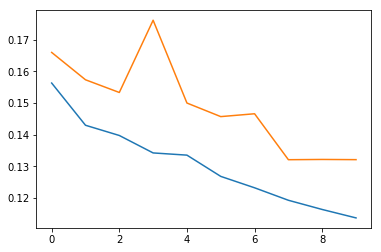

In [174]:
plt.plot(history_v2.history['loss'], label = 'training')
plt.plot(history_v2.history['val_loss'], label = 'validation')

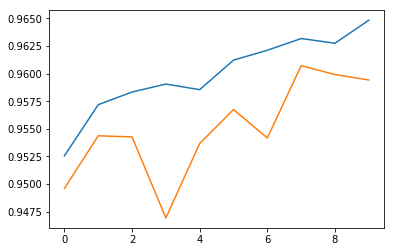

In [176]:
plt.plot(history_v2.history['acc'], label = 'training')
plt.plot(history_v2.history['val_acc'], label = 'validation')

In [177]:
y_pred = model_v2.predict_classes(X_test)

In [193]:
y_pred_prob = model_v2.predict(X_test)

In [196]:
np.round(y_pred_prob, 4)

array([[1.000e-04, 1.000e-03, 1.000e-04, ..., 0.000e+00, 9.977e-01,
        1.000e-04],
       [0.000e+00, 9.988e-01, 2.000e-04, ..., 0.000e+00, 1.000e-04,
        1.000e-04],
       [0.000e+00, 0.000e+00, 0.000e+00, ..., 6.000e-04, 4.000e-04,
        9.984e-01],
       ...,
       [0.000e+00, 3.000e-04, 3.000e-04, ..., 1.000e-04, 2.000e-04,
        3.000e-04],
       [9.896e-01, 1.000e-04, 2.300e-03, ..., 2.000e-04, 4.000e-04,
        5.000e-04],
       [0.000e+00, 0.000e+00, 0.000e+00, ..., 5.000e-04, 4.000e-04,
        9.982e-01]], dtype=float32)

In [179]:
y_pred

array([8, 1, 9, ..., 3, 0, 9])

In [183]:
y_test

array([[0., 0., 0., ..., 0., 1., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [186]:
y_test_labels = np.argmax(y_test, axis = 1)

In [185]:
from sklearn.metrics import confusion_matrix

In [189]:
cm_v2 = confusion_matrix(y_test_labels, y_pred)

In [188]:
import seaborn as sn

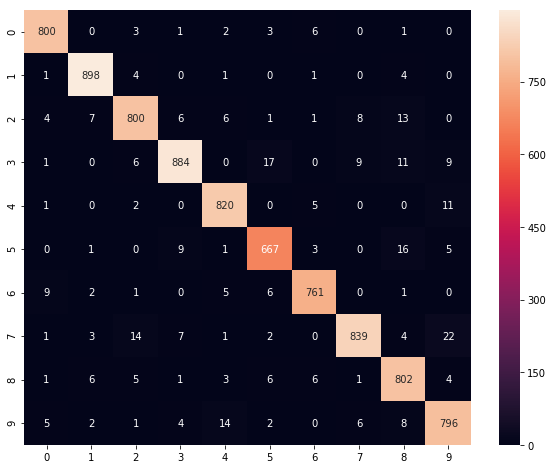

In [192]:
plt.figure(figsize=(10,8))
sn.heatmap(cm_v2, annot=True, fmt = '0.0f')